In [12]:
filename = "data1.csv"
units  = r"угл.сек/ангстрем"

xlabel = r'$m$'
ylabel = r'$D$, угл.сек/ангстрем'

In [2]:
import numpy as np
import pandas as pd
import sympy as sp
import statsmodels.api as sm
import math


# Load data
data = pd.read_csv(filename, engine='python', sep = ',', header=None)

In [3]:
data

,0,1
0,1,11.90476
1,-1,-10.76190
2,2,27.42857
3,-2,-26.14290


In [4]:
# Exract arrays
y = np.array(data[1])
t = np.array(data[0])
t = sm.add_constant(t, prepend=False)

In [5]:
# Fitting
model = sm.OLS(y,t)
result = model.fit()

# Saving parameters
s_err, i_err = result.bse
s, i = result.params

In [6]:
result.summary().tables[1]

/Users/ri/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


,coef,std err,t,P>|t|,[0.025,0.975]
x1,12.9810,0.583,22.276,0.002,10.474,15.488
const,0.6071,0.921,0.659,0.578,-3.357,4.572


In [13]:
import matplotlib.pylab as plt
from matplotlib import rc
from matplotlib.ticker import AutoMinorLocator
# Plot size
plt.rcParams['figure.figsize'] = (8, 5)

rc('text.latex', preamble=r"\usepackage[utf8]{inputenc}")
rc('text.latex', preamble=r"\usepackage[russian]{babel}")
rc('text.latex', preamble=r"\usepackage{lmodern}")
rc('text.latex', preamble=r"\usepackage[T2A]{fontenc}")
rc('text.latex', unicode=True)

# Options
params = {'text.usetex' : True,
          'font.size' : 11,
          'font.family' : 'lmodern',
          'text.latex.unicode': True,
          }

plt.rcParams.update(params)
fig, ax = plt.subplots()

minor_locator = AutoMinorLocator(4)
ax.yaxis.set_minor_locator(minor_locator)

#ax.yaxis.set_ticks(np.arange(0, 1, 0.2))

plt.plot(data[0],data[1],'ro', np.arange(-2, 3, 0.5), np.arange(-2, 3, 0.5)*s+i,'k--')

plt.xlabel(xlabel)
plt.ylabel(ylabel)



label = r"$k=(" + "{:.3f}".format(s) + r"\pm" + "{:.3f}".format(s_err) + ")$ " + units
ax.text(0.05, 0.9, label, transform=ax.transAxes, bbox={'facecolor':'white', 'edgecolor':'black', 'pad':10})

ax.grid(color='g', linestyle='--', linewidth=0.6)
ax.grid(color='g', linestyle='--', linewidth=0.1, which = 'minor' )

res = plt.gcf()

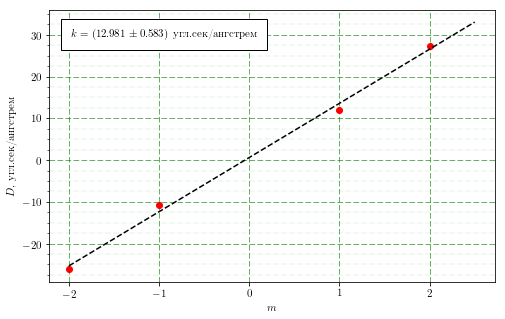

In [14]:
plt.show()

In [15]:
# Save file
res.savefig("graph1.pdf", 
            dpi=1000, 
            # Plot will be occupy a maximum of available space
            bbox_inches='tight', 
            )